In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


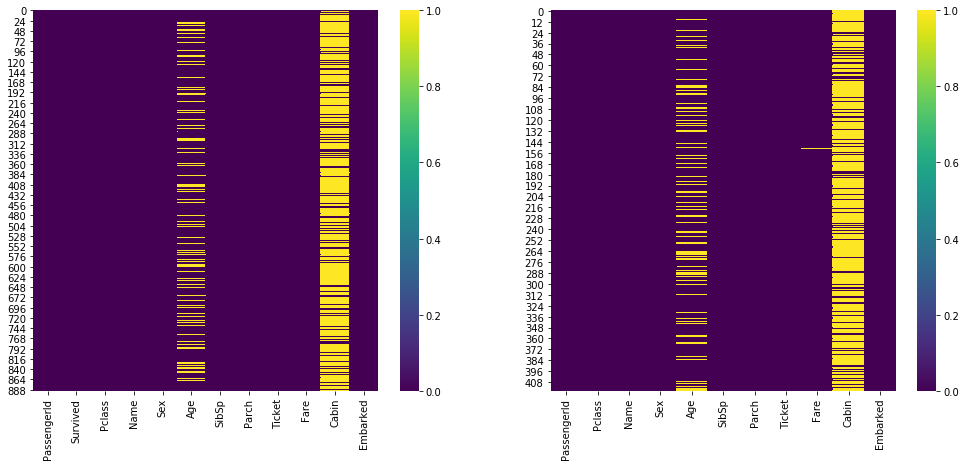

In [3]:
plt.figure(figsize=(17,7))
plt.subplot(1,2,1)
sns.heatmap(train.isnull(),cmap='viridis')
plt.subplot(1,2,2)
sns.heatmap(test.isnull(),cmap='viridis')

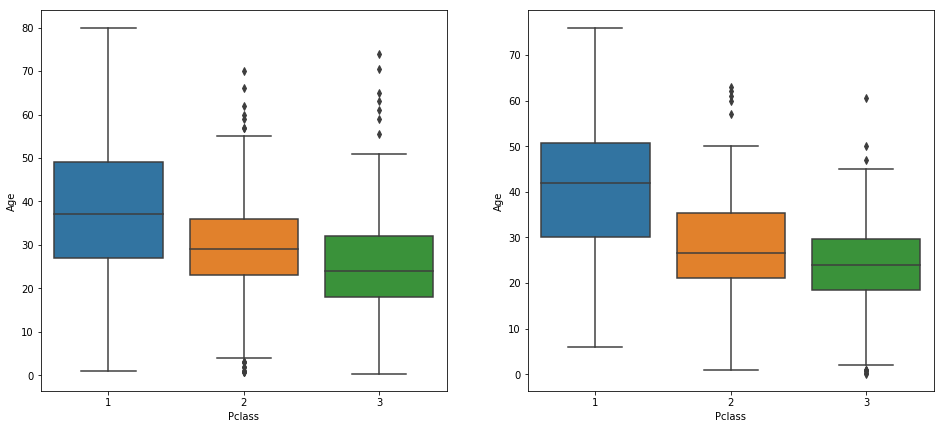

In [4]:
plt.figure(figsize=(16,7))
plt.subplot(1,2,1)
sns.boxplot(x='Pclass',y='Age',data=train)
plt.subplot(1,2,2)
sns.boxplot(x='Pclass',y='Age',data=test)

In [5]:
#filling NaN in the age column with the mean of the respective class 
def fillageNaN(cols):
    Age=cols[0]
    Pclass=cols[1]
    if pd.isnull(Age):
        if Pclass==1:
            return 37
        elif Pclass==2:
            return 29
        else:
            return 26
    else:
        return Age
def fillageNaN_t(cols):
    Age=cols[0]
    Pclass=cols[1]
    if pd.isnull(Age):
        if Pclass==1:
            return 42
        elif Pclass==2:
            return 26
        else:
            return 22
    else:
        return Age

In [6]:
train['Age']=train[['Age','Pclass']].apply(fillageNaN,axis=1)
test['Age']=train[['Age','Pclass']].apply(fillageNaN_t,axis=1)

In [7]:
train['Cabin']=train['Cabin'].fillna('N')
test['Cabin']=test['Cabin'].fillna('N')
train.Cabin=train.Cabin.apply(lambda x:x[0])
test.Cabin=train.Cabin.apply(lambda x:x[0])

In [8]:
sex=pd.get_dummies(train['Sex'],drop_first=True)
sex_t=pd.get_dummies(test['Sex'],drop_first=True)

In [9]:
embark=pd.get_dummies(train['Embarked'],drop_first=True)
embark_t=pd.get_dummies(test['Embarked'],drop_first=True)

In [10]:
cabin=pd.get_dummies(train['Cabin'],drop_first=True)
cabin_t=pd.get_dummies(test['Cabin'],drop_first=True)

In [11]:
train.drop(['PassengerId','Sex','Embarked','Ticket','Name','Cabin'],axis=1,inplace=True)
test.drop(['Sex','Embarked','Ticket','Name','Cabin'],axis=1,inplace=True)

In [12]:
train=pd.concat([train,sex,embark,cabin],axis=1)
test=pd.concat([test,sex_t,embark_t,cabin_t],axis=1)

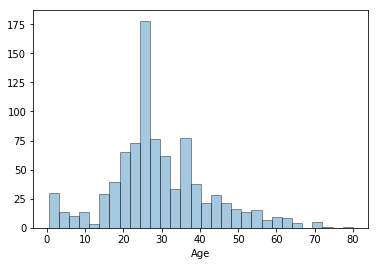

In [14]:
sns.distplot(train['Age'],bins=30,kde=False,hist_kws=dict(edgecolor='black'))

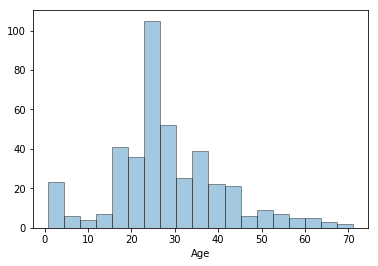

In [15]:
sns.distplot(test['Age'],kde=False,hist_kws=dict(edgecolor='black'))

In [17]:
def age_grp(i):
        if 0<=i<10:
            return 1
        if 10<=i<20:
            return 2
        if 20<=i<30:
            return 3
        if 30<=i<40:
            return 4
        if 40<=i<50:
            return 5
        if 50<=i<60:
            return 6
        if 60<=i<70:
            return 7
        if 70<=i<80:
            return 8
    

In [18]:
train['Age']=train['Age'].apply(age_grp)
test['Age']=test['Age'].apply(age_grp)

In [19]:
train.dropna(inplace=True)

In [20]:
X=train.drop('Survived',axis=1)
y=train['Survived']

In [21]:
from sklearn.model_selection import train_test_split
X_train,X_cv,y_train,y_cv=train_test_split(X,y,test_size=0.2)

In [22]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [23]:
pred=lr.predict(X_cv)

In [24]:
from sklearn.metrics import make_scorer, accuracy_score

In [25]:
acc_scorer = make_scorer(accuracy_score)

In [26]:
print(accuracy_score(y_cv, pred))

0.775280898876


In [29]:
from sklearn.model_selection import GridSearchCV
param_grid={'C':[0.1,0.3,1,3,10,30,100,300,1000,3000],'max_iter':[100,150,200,250]}

In [30]:
grid=GridSearchCV(LogisticRegression(),param_grid,verbose=3)

In [31]:
grid.fit(X_train,y_train)

Fitting 3 folds for each of 40 candidates, totalling 120 fits
[CV] C=0.1, max_iter=100 .............................................
[CV] ..... C=0.1, max_iter=100, score=0.773109243697479, total=   0.0s
[CV] C=0.1, max_iter=100 .............................................
[CV] .... C=0.1, max_iter=100, score=0.8025210084033614, total=   0.0s
[CV] C=0.1, max_iter=100 .............................................
[CV] .... C=0.1, max_iter=100, score=0.7923728813559322, total=   0.0s
[CV] C=0.1, max_iter=150 .............................................
[CV] ..... C=0.1, max_iter=150, score=0.773109243697479, total=   0.0s
[CV] C=0.1, max_iter=150 .............................................
[CV] .... C=0.1, max_iter=150, score=0.8025210084033614, total=   0.0s
[CV] C=0.1, max_iter=150 .............................................
[CV] .... C=0.1, max_iter=150, score=0.7923728813559322, total=   0.0s
[CV] C=0.1, max_iter=200 .............................................
[CV] ..... C=0.

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] .... C=0.3, max_iter=250, score=0.8008474576271186, total=   0.0s
[CV] C=1, max_iter=100 ...............................................
[CV] ...... C=1, max_iter=100, score=0.7857142857142857, total=   0.0s
[CV] C=1, max_iter=100 ...............................................
[CV] ...... C=1, max_iter=100, score=0.8109243697478992, total=   0.0s
[CV] C=1, max_iter=100 ...............................................
[CV] ...... C=1, max_iter=100, score=0.7838983050847458, total=   0.0s
[CV] C=1, max_iter=150 ...............................................
[CV] ...... C=1, max_iter=150, score=0.7857142857142857, total=   0.0s
[CV] C=1, max_iter=150 ...............................................
[CV] ...... C=1, max_iter=150, score=0.8109243697478992, total=   0.0s
[CV] C=1, max_iter=150 ...............................................
[CV] ...... C=1, max_iter=150, score=0.7838983050847458, total=   0.0s
[CV] C=1, max_iter=200 ...............................................
[CV] .

[CV] .... C=100, max_iter=250, score=0.7838983050847458, total=   0.0s
[CV] C=300, max_iter=100 .............................................
[CV] .... C=300, max_iter=100, score=0.7941176470588235, total=   0.0s
[CV] C=300, max_iter=100 .............................................
[CV] .... C=300, max_iter=100, score=0.7983193277310925, total=   0.0s
[CV] C=300, max_iter=100 .............................................
[CV] .... C=300, max_iter=100, score=0.7796610169491526, total=   0.0s
[CV] C=300, max_iter=150 .............................................
[CV] .... C=300, max_iter=150, score=0.7941176470588235, total=   0.0s
[CV] C=300, max_iter=150 .............................................
[CV] .... C=300, max_iter=150, score=0.7983193277310925, total=   0.0s
[CV] C=300, max_iter=150 .............................................
[CV] .... C=300, max_iter=150, score=0.7796610169491526, total=   0.0s
[CV] C=300, max_iter=200 .............................................
[CV] .

[Parallel(n_jobs=1)]: Done 120 out of 120 | elapsed:    0.8s finished


GridSearchCV(cv=None, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [0.1, 0.3, 1, 3, 10, 30, 100, 300, 1000, 3000], 'max_iter': [100, 150, 200, 250]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=3)

In [33]:
grid_pred=grid.predict(X_cv)

In [34]:
print(accuracy_score(y_cv,grid_pred))

0.775280898876


In [38]:
X_test=test.drop('PassengerId',axis=1)

In [58]:
test.dropna(inplace=True)

In [42]:
X_test.dropna(inplace=True)

In [43]:
test_pred=grid.predict(X_test)

In [59]:
result=pd.DataFrame(data=test['PassengerId'],columns=['PassengerId'])

In [60]:
result['Survived']=test_pred

In [61]:
result.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [63]:
result.to_csv('submissions_LogisticRegression.csv',index=False)